# Analyse des Schlaganfallrisikos mit maschinellem Lernen

**Projekt:** AMLHC-FINAL-EXAM  
**Datensatz:** Stroke Prediction Dataset  
**Forschungsfrage:**  
Wie gut kann ein ML-Modell das Schlaganfallrisiko vorhersagen und welche Verzerrungen entstehen durch Alter oder Geschlecht?


In [2]:
import pandas as pd

# Datensatz laden
df = pd.read_csv("../data/healthcare-dataset-stroke-prediction.csv")

# Vorschau auf die ersten 5 Zeilen
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Fehlende Werte behandeln

Wir prüfen den Datensatz auf fehlende Werte und bereinigen diese.
Besonders in den Spalten `bmi` und `smoking_status` können Lücken auftreten.


In [3]:
# Anzahl fehlender Werte pro Spalte anzeigen
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# Fehlende Werte in 'bmi' mit Median ersetzen
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Fehlende Werte in 'smoking_status' mit "Unknown" füllen
df['smoking_status'] = df['smoking_status'].fillna("Unknown")


In [5]:
# Kontrolle: Jetzt sollte alles 0 sein
df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Erste Bias-Analyse: Geschlechterverteilung

Wir analysieren, ob die Geschlechter im Datensatz gleichmäßig verteilt sind. 
Eine ungleiche Verteilung kann zu Verzerrungen (Bias) führen.


In [6]:
# Geschlechterverteilung anzeigen
df['gender'].value_counts(normalize=True) * 100


gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

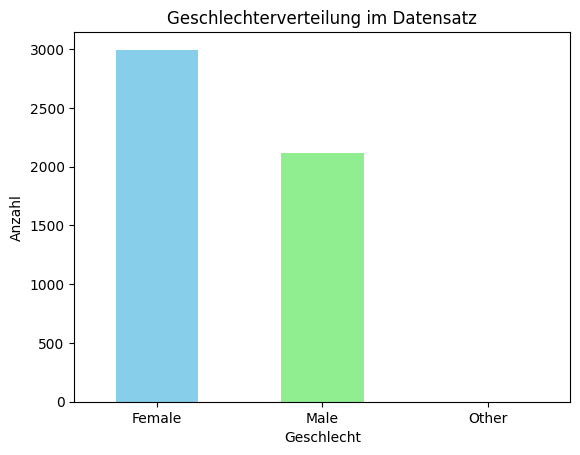

In [7]:
import matplotlib.pyplot as plt

# Diagramm zur Geschlechterverteilung
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightgray'])
plt.title("Geschlechterverteilung im Datensatz")
plt.ylabel("Anzahl")
plt.xlabel("Geschlecht")
plt.xticks(rotation=0)
plt.show()


## Bias-Analyse: Altersverteilung

Wir analysieren die Altersverteilung im Datensatz, um mögliche Verzerrungen zu erkennen.  
Eine ungleichmäßige Verteilung kann die Objektivität des Modells beeinträchtigen.


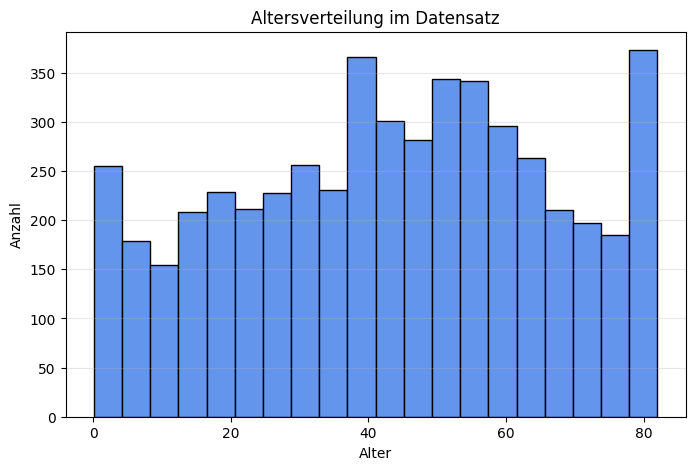

In [8]:
# Verteilung des Alters als Histogramm
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, color='cornflowerblue', edgecolor='black')
plt.title("Altersverteilung im Datensatz")
plt.xlabel("Alter")
plt.ylabel("Anzahl")
plt.grid(axis='y', alpha=0.3)
plt.show()


## Analyse der Zielvariable: `stroke`

Wir prüfen die Verteilung der Zielvariable `stroke`.  
Ein unausgeglichenes Verhältnis zwischen Klassen (z. B. viele "0", wenige "1") kann das Modell stark beeinflussen.


In [9]:
# Klassenverteilung anzeigen
df['stroke'].value_counts(normalize=True) * 100


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

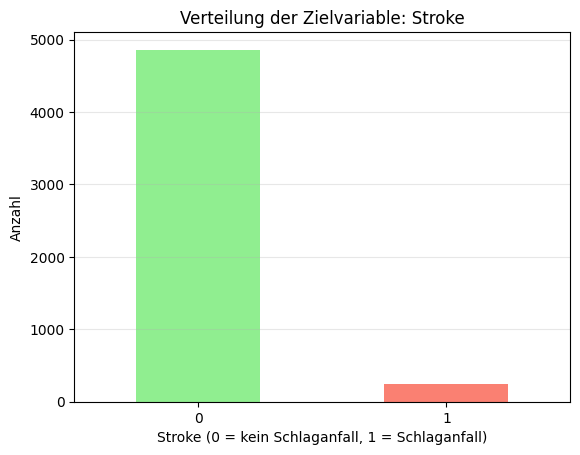

In [10]:
import matplotlib.pyplot as plt

# Diagramm zur Klassenverteilung
df['stroke'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Verteilung der Zielvariable: Stroke")
plt.xlabel("Stroke (0 = kein Schlaganfall, 1 = Schlaganfall)")
plt.ylabel("Anzahl")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()
